
<body>
<h1>ISDA 111 - Video Game Data Analytics Project</h1>
<p>Hi team, This is the starter document we can use.</p>
<h2>Team Members: add your name here</h2>
<p>Chris Alcala - Handimexi</p>
<p>Wilson Huynh - mybedro0m</p>
<p>Fernando Valle - Jando Fett</p>

<p>Qusestions our research will answer?</p>
<p>1.) Is the Steam gameing community growing? If so how much?</p>
<p>2.) What are the top 10 most popular games overall and by some categories?</p>
<p>3.) </p>
<p>4.) </p>
<p>5.) </p>

</body>



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

In [3]:
df = pd.read_csv("game_data_all.csv")
df.columns

Index(['Unnamed: 0', 'game', 'link', 'release', 'peak_players',
       'positive_reviews', 'negative_reviews', 'total_reviews', 'rating',
       'primary_genre', 'store_genres', 'publisher', 'developer',
       'detected_technologies', 'store_asset_mod_time', 'review_percentage',
       'players_right_now', '24_hour_peak', 'all_time_peak',
       'all_time_peak_date'],
      dtype='object')

In [4]:
#Rename columns
df = df.rename(columns={
    '24_hour_peak': 'peak24',
    'all_time_peak': 'peak_all',
    'all_time_peak_date': 'peak_all_date',
    'link': 'url'
})

#Convert dates 
if 'release' in df.columns:
    df['release'] = pd.to_datetime(df['release'], errors='coerce')

if 'peak_all_date' in df.columns:
    df['peak_all_date'] = pd.to_datetime(df['peak_all_date'], errors='coerce')


#Convert numeric columns
num_cols = [
    'peak_players', 
    'positive_reviews', 
    'negative_reviews',
    'total_reviews',
    'peak24', 
    'peak_all'
]

for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


#Remove duplicates + rows missing game name
if 'game' in df.columns:
    df = df[df['game'].notna()]

df = df.drop_duplicates()


#Fill missing numeric & text values
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

for col in ['publisher', 'developer', 'game']:
    if col in df.columns:
        df[col] = df[col].fillna("Unknown")


#Create simple new features
if 'release' in df.columns:
    df['year'] = df['release'].dt.year

if 'positive_reviews' in df.columns and 'total_reviews' in df.columns:
    df['pos_ratio'] = df['positive_reviews'] / (df['total_reviews'] + 1)


#show output
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67571 entries, 0 to 67570
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             67571 non-null  int64         
 1   game                   67571 non-null  object        
 2   url                    67571 non-null  object        
 3   release                67571 non-null  datetime64[ns]
 4   peak_players           67571 non-null  int64         
 5   positive_reviews       67571 non-null  int64         
 6   negative_reviews       67571 non-null  int64         
 7   total_reviews          67571 non-null  int64         
 8   rating                 67571 non-null  float64       
 9   primary_genre          67561 non-null  object        
 10  store_genres           67514 non-null  object        
 11  publisher              67571 non-null  object        
 12  developer              67571 non-null  object        
 13  d

   Unnamed: 0                              game            url    release  \
0           0                       Pizza Tower  /app/2231450/ 2023-01-26   
1           1                   Resident Evil 4  /app/2050650/ 2023-03-24   
2           2  The Murder of Sonic the Hedgehog  /app/2324650/ 2023-03-31   
3           3                Pineapple on pizza  /app/2263010/ 2023-03-28   
4           4                        Hi-Fi RUSH  /app/1817230/ 2023-01-25   

   peak_players  ...  peak24  peak_all  peak_all_date  year pos_ratio  
0          4529  ...     0.0      4529     2023-03-25  2023  0.988620  
1        168191  ...     0.0    168191     2023-03-25  2023  0.974483  
2         15543  ...   776.0     15543     2023-03-31  2023  0.983355  
3          1415  ...   101.0      1415     2023-03-28  2023  0.982393  
4          6132  ...   664.0      6132     2023-01-29  2023  0.977551  

[5 rows x 22 columns]

In [5]:
df.describe()


         Unnamed: 0                        release  peak_players  \
count  67571.000000                          67571  6.757100e+04   
mean   33785.000000  2019-09-19 12:39:46.609640448  9.528674e+02   
min        0.000000            2006-02-07 00:00:00  0.000000e+00   
25%    16892.500000            2018-01-26 00:00:00  3.000000e+00   
50%    33785.000000            2020-03-29 00:00:00  7.000000e+00   
75%    50677.500000            2021-11-16 00:00:00  4.600000e+01   
max    67570.000000            2023-12-31 00:00:00  3.257248e+06   
std    19506.211857                            NaN  1.979093e+04   

       positive_reviews  negative_reviews  ...        peak24      peak_all  \
count      6.757100e+04      67571.000000  ...  67571.000000  6.757100e+04   
mean       1.273527e+03        216.893801  ...     11.776058  9.629879e+02   
min        0.000000e+00          0.000000  ...      0.000000  0.000000e+00   
25%        5.000000e+00          1.000000  ...      0.000000  3.000000e+00 

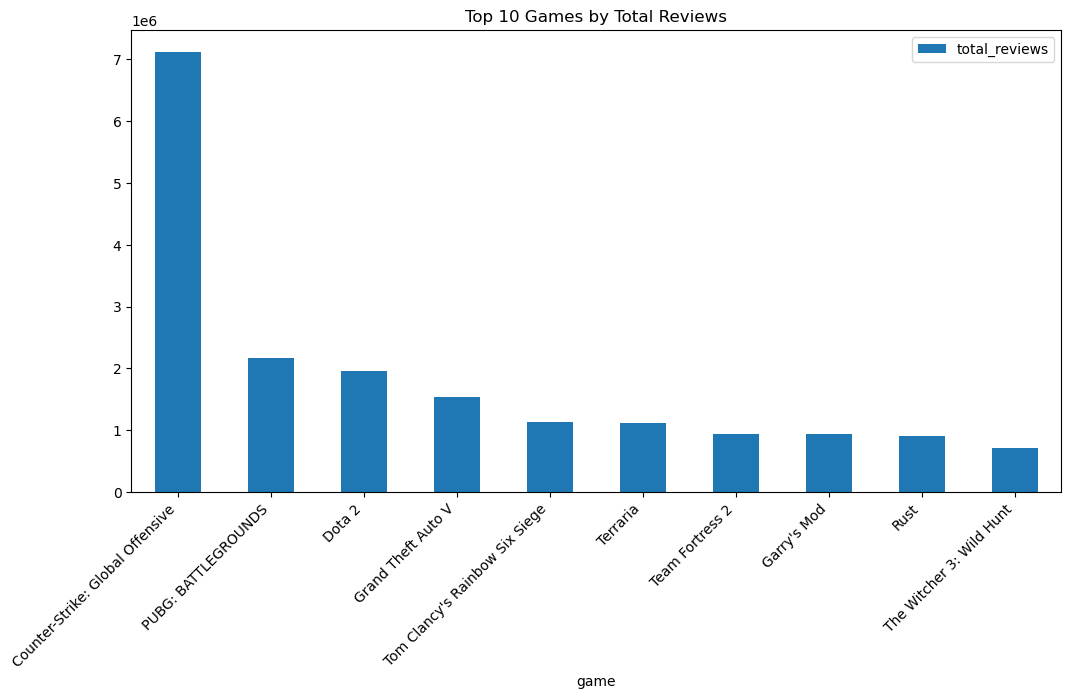

In [17]:
#This graph highlights the games with the most total reviews, showing which titles have the largest and most active player communities.
df.nlargest(10, 'total_reviews')[['game', 'total_reviews']].plot(
    x='game', y='total_reviews', kind='bar', figsize=(12,6)
)
plt.title("Top 10 Games by Total Reviews")
plt.xticks(rotation=45, ha='right')
plt.show()


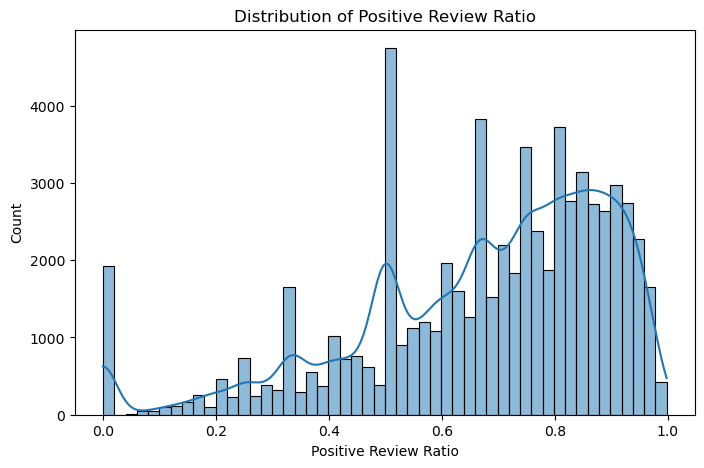

In [18]:
#This histogram shows how most games receive a high percentage of positive reviews, with fewer games falling into lower ratings.
plt.figure(figsize=(8,5))
sns.histplot(df['pos_ratio'], bins=50, kde=True)
plt.title("Distribution of Positive Review Ratio")
plt.xlabel("Positive Review Ratio")
plt.ylabel("Count")
plt.show()


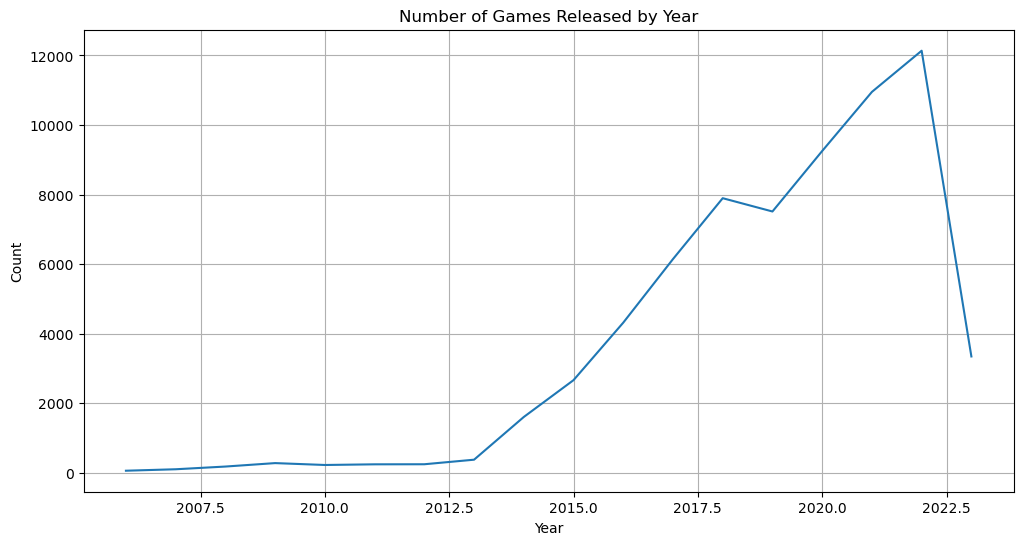

In [19]:
#This graph displays how the number of games released each year has changed, revealing overall growth in game publishing over time.
df['year'].value_counts().sort_index().plot(
    kind='line', figsize=(12,6)
)
plt.title("Number of Games Released by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()


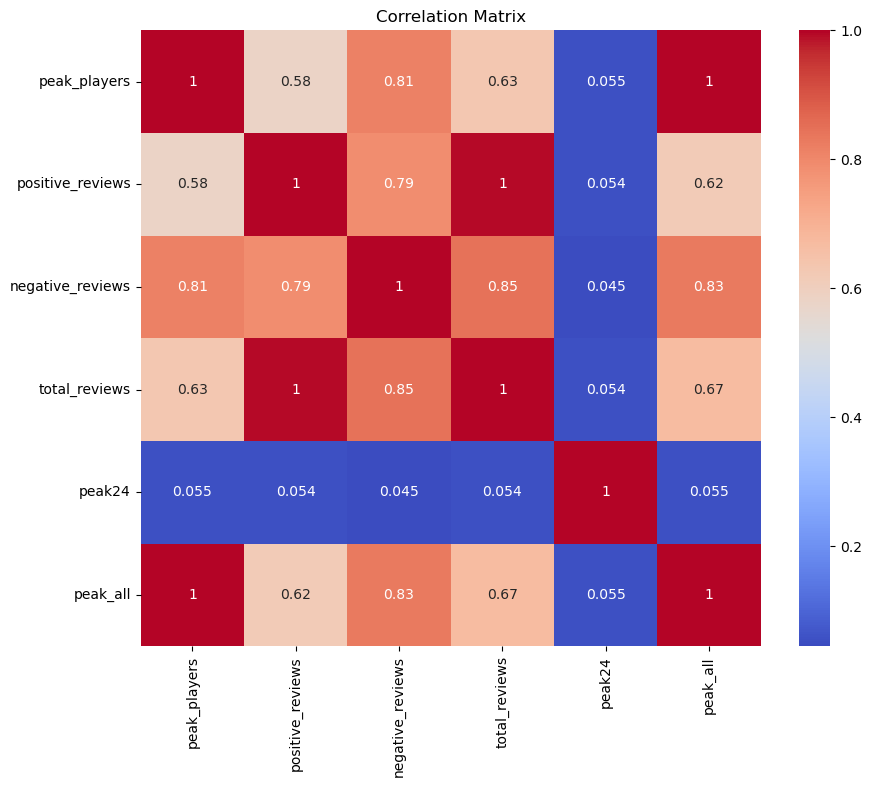

In [20]:
#The heatmap shows how different game metrics relate to each other, with strong correlations indicating connected player and review patterns.
plt.figure(figsize=(10,8))
sns.heatmap(df[['peak_players','positive_reviews','negative_reviews','total_reviews','peak24','peak_all']].corr(), 
            annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
